# Examples of data analysis

This notebook shows how to analyse the HEE dataset from the ABCE Open Data Project. 

View the dataset here: 'Insert figshare link'

View this notebook on GitHub here: 'Insert GitHub link'

# Setup

In [1]:
import io
import pandas as pd
import json
import requests
import numpy as np
from matplotlib import pyplot as plt 

# Get CSV file from figshare

This downloads the HEE.CSV file directly from the Figshare data repository.

In [2]:
csv_download_url= 'https://raw.githubusercontent.com/building-energy/ABCE_Open_Data_Project/main/external_datasets/Household_Energy_Efficiency_Statistics/HEE.csv'
response=requests.get(csv_download_url)
csv_text=response.text
csv_text.split('\n')[:6]

['Installation month,ECO,Cashback,Green Deal Finance Plans,Green Deal Home Improvement Fund ,Green Deal Communities,Total number of measures installed\r',
 '01/01/2013,14430,0,0,,,14430\r',
 '01/02/2013,18595,96,0,,,18691\r',
 '01/03/2013,21244,136,0,,,21380\r',
 '01/04/2013,27812,110,0,,,27922\r',
 '01/05/2013,33044,145,0,,,33189\r']

# Get metadata.json file from figshare

The CSV data is in CSV on the Web (CSVW) format and so there is an additional accompanying metadata file. The code below downloads this directly from the Figshare data repository.

In [3]:
metadata_json_download_url='https://raw.githubusercontent.com/building-energy/ABCE_Open_Data_Project/main/external_datasets/Household_Energy_Efficiency_Statistics/HEE.csv-metadata.json'
response=requests.get(metadata_json_download_url)
metadata_text=response.text
metadata_dict=json.loads(metadata_text)
metadata_dict

{'@context': 'http://www.w3.org/ns/csvw',
 '@type': 'Table',
 'url': 'HEE.csv',
 'dc:title': 'Number of Measures installed through Energy Company Obligation (ECO) and under the Green Deal Framework, by installation month',
 'dc:description': 'The table summarises the number of measures installed by under Energy Company Obligation (ECO) and the various Green Deal Framework schemes from January 2013 to March 2022',
 'dc:abstract': 'This worksheet contains one table. Data covers from January 2013 to March 2022. Some columns and cells refer to notes. The data contains blank cells. These indicate that there is no data but are kept to allow easy comparisons between tables. Blank cells within the table indicate where it was not possible to install measures in these months, as the scheme was not in operation.',
 'dc:creator': 'Department for Business, Energy and Industrial Strategy',
 'dc:source': 'https://data.gov.uk/dataset/1656fb7d-1ca3-462d-a11b-8078acc33275/household-energy-efficiency-sta

# Read data from CSV text

This reads the text from the downloaded CSV file into a Pandas DataFrame for further analysis.

In [4]:
df=pd.read_csv(io.StringIO(csv_text))
df.columns=df.columns.str.strip()
df.head()

,Installation month,ECO,Cashback,Green Deal Finance Plans,Green Deal Home Improvement Fund,Green Deal Communities,Total number of measures installed
0,01/01/2013,14430,0.0,0,NaN,NaN,14430
1,01/02/2013,18595,96.0,0,NaN,NaN,18691
2,01/03/2013,21244,136.0,0,NaN,NaN,21380
3,01/04/2013,27812,110.0,0,NaN,NaN,27922
4,01/05/2013,33044,145.0,0,NaN,NaN,33189


# Analysis: Total number of measures installed between between 2013-2022

This is an example analysis for the HEE dataset. The total number of measures between 2013-2022 are represented in the form of a bar graph.

### Create seperate data frames for each year. Note, there are only 3 months worth of data for year 2022. 

In [5]:
df['Installation month'] = pd.to_datetime(df['Installation month'])

df_2013 = df.loc[(df['Installation month'] >= '2013-01-01')
                     & (df['Installation month'] <= '2013-01-12')]
df_2014 = df.loc[(df['Installation month'] >= '2014-01-01')
                     & (df['Installation month'] <= '2014-01-12')]
df_2015 = df.loc[(df['Installation month'] >= '2015-01-01')
                     & (df['Installation month'] <= '2015-01-12')]
df_2016 = df.loc[(df['Installation month'] >= '2016-01-01')
                     & (df['Installation month'] <= '2016-01-12')]
df_2017 = df.loc[(df['Installation month'] >= '2017-01-01')
                     & (df['Installation month'] <= '2017-01-12')]
df_2018 = df.loc[(df['Installation month'] >= '2018-01-01')
                     & (df['Installation month'] <= '2018-01-12')]
df_2019 = df.loc[(df['Installation month'] >= '2019-01-01')
                     & (df['Installation month'] <= '2019-01-12')]
df_2020 = df.loc[(df['Installation month'] >= '2020-01-01')
                     & (df['Installation month'] <= '2020-01-12')]
df_2021 = df.loc[(df['Installation month'] >= '2021-01-01')
                     & (df['Installation month'] <= '2021-01-12')]
df_2022 = df.loc[(df['Installation month'] >= '2022-01-01')
                     & (df['Installation month'] <= '2022-01-12')]

#example
df_2013

,Installation month,ECO,Cashback,Green Deal Finance Plans,Green Deal Home Improvement Fund,Green Deal Communities,Total number of measures installed
0,2013-01-01,14430,0.0,0,NaN,NaN,14430
1,2013-01-02,18595,96.0,0,NaN,NaN,18691
2,2013-01-03,21244,136.0,0,NaN,NaN,21380
3,2013-01-04,27812,110.0,0,NaN,NaN,27922
4,2013-01-05,33044,145.0,0,NaN,NaN,33189
5,2013-01-06,33769,3337.0,5,NaN,NaN,37111
6,2013-01-07,43441,1266.0,7,NaN,NaN,44714
7,2013-01-08,49575,1158.0,133,NaN,NaN,50866
8,2013-01-09,58514,1012.0,170,NaN,NaN,59696
9,2013-01-10,71772,844.0,526,NaN,NaN,73142


### Sum the total number of measures installed per year (2013-2022)

In [6]:
df_2013 = df.loc[(df['Installation month'] >= '2013-01-01')
                     & (df['Installation month'] <= '2013-01-12')]
total_2013 = df_2013['Total number of measures installed'].sum()

df_2014 = df.loc[(df['Installation month'] >= '2014-01-01')
                     & (df['Installation month'] <= '2014-01-12')]
total_2014 = df_2014['Total number of measures installed'].sum()

df_2015 = df.loc[(df['Installation month'] >= '2015-01-01')
                     & (df['Installation month'] <= '2015-01-12')]
total_2015 = df_2015['Total number of measures installed'].sum()

df_2016 = df.loc[(df['Installation month'] >= '2016-01-01')
                     & (df['Installation month'] <= '2016-01-12')]
total_2016 = df_2016['Total number of measures installed'].sum()

df_2017 = df.loc[(df['Installation month'] >= '2017-01-01')
                     & (df['Installation month'] <= '2017-01-12')]
total_2017 = df_2017['Total number of measures installed'].sum()

df_2018 = df.loc[(df['Installation month'] >= '2018-01-01')
                     & (df['Installation month'] <= '2018-01-12')]
total_2018 = df_2018['Total number of measures installed'].sum()

df_2019 = df.loc[(df['Installation month'] >= '2019-01-01')
                     & (df['Installation month'] <= '2019-01-12')]
total_2019 = df_2019['Total number of measures installed'].sum()

df_2020 = df.loc[(df['Installation month'] >= '2020-01-01')
                     & (df['Installation month'] <= '2020-01-12')]
total_2020 = df_2020['Total number of measures installed'].sum()

df_2021 = df.loc[(df['Installation month'] >= '2021-01-01')
                     & (df['Installation month'] <= '2021-01-12')]
total_2021 = df_2021['Total number of measures installed'].sum()

df_2022 = df.loc[(df['Installation month'] >= '2022-01-01')
                     & (df['Installation month'] <= '2022-01-12')]
total_2022 = df_2022['Total number of measures installed'].sum()

#example
total_2013

530878

### Plot values in the form of a bar graph using Matplotlib

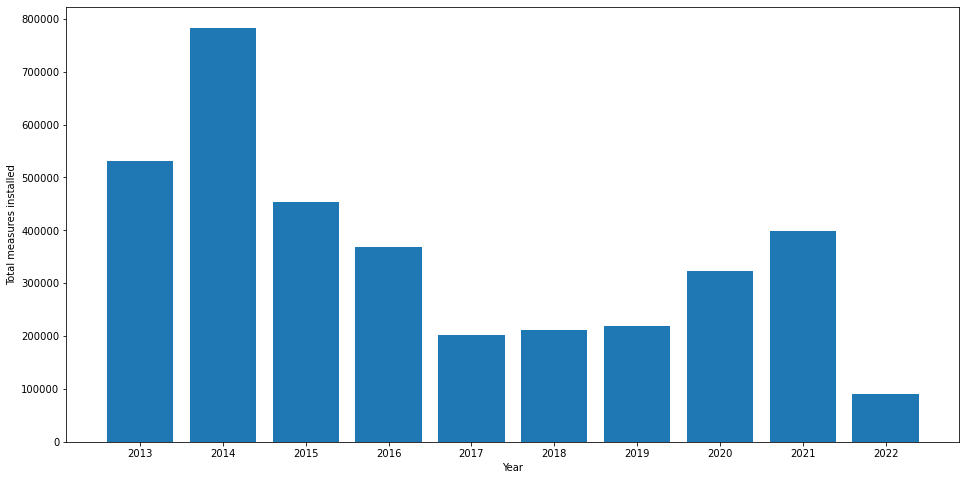

           Figure X: Total number of measures installed between 2013-2022.


In [9]:
Year = [2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
Number_of_measures_installed = [total_2013,total_2014,total_2015,total_2016,total_2017,total_2018,total_2019,total_2020,total_2021,total_2022]

plt.bar(Year,Number_of_measures_installed)
plt.xlabel('Year')
plt.ylabel('Total measures installed')
plt.rcParams["figure.figsize"] = (16,8)
plt.xticks(Year,[2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
plt.savefig('bar_chart_plot.png')
plt.show()
print('           Figure X: Total number of measures installed between 2013-2022.')